En este ejercicio se utilizará el conjunto de datos **California Housing Prices**. Este dataset está basado en datos de un censo de California de 1990.

Este conjunto de datos nos permite obtener una predicción del precio promedio de una vivienda en un distrito particular de California.

## Cargar los datos

*   Este dataset tiene 20640 instancias o ejemplos
*   La variable de salida o "target" es `median_house_value` de tipo numérica flotante 
*   Cada instancia tiene 9 atributos sin contar la variable de salida. El atributo `total_bedrooms` tiene datos faltantes
*   Los atributos son todos de tipo flotantes excepto `ocean_proximity`que es de tipo categórico.
*   El atributo `ocean_proximity` es de tipo categórico. Tiene 5 categorías.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_housing = pd.read_csv("../data/housing.csv")

In [4]:
df_housing.shape

(20640, 10)

In [5]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

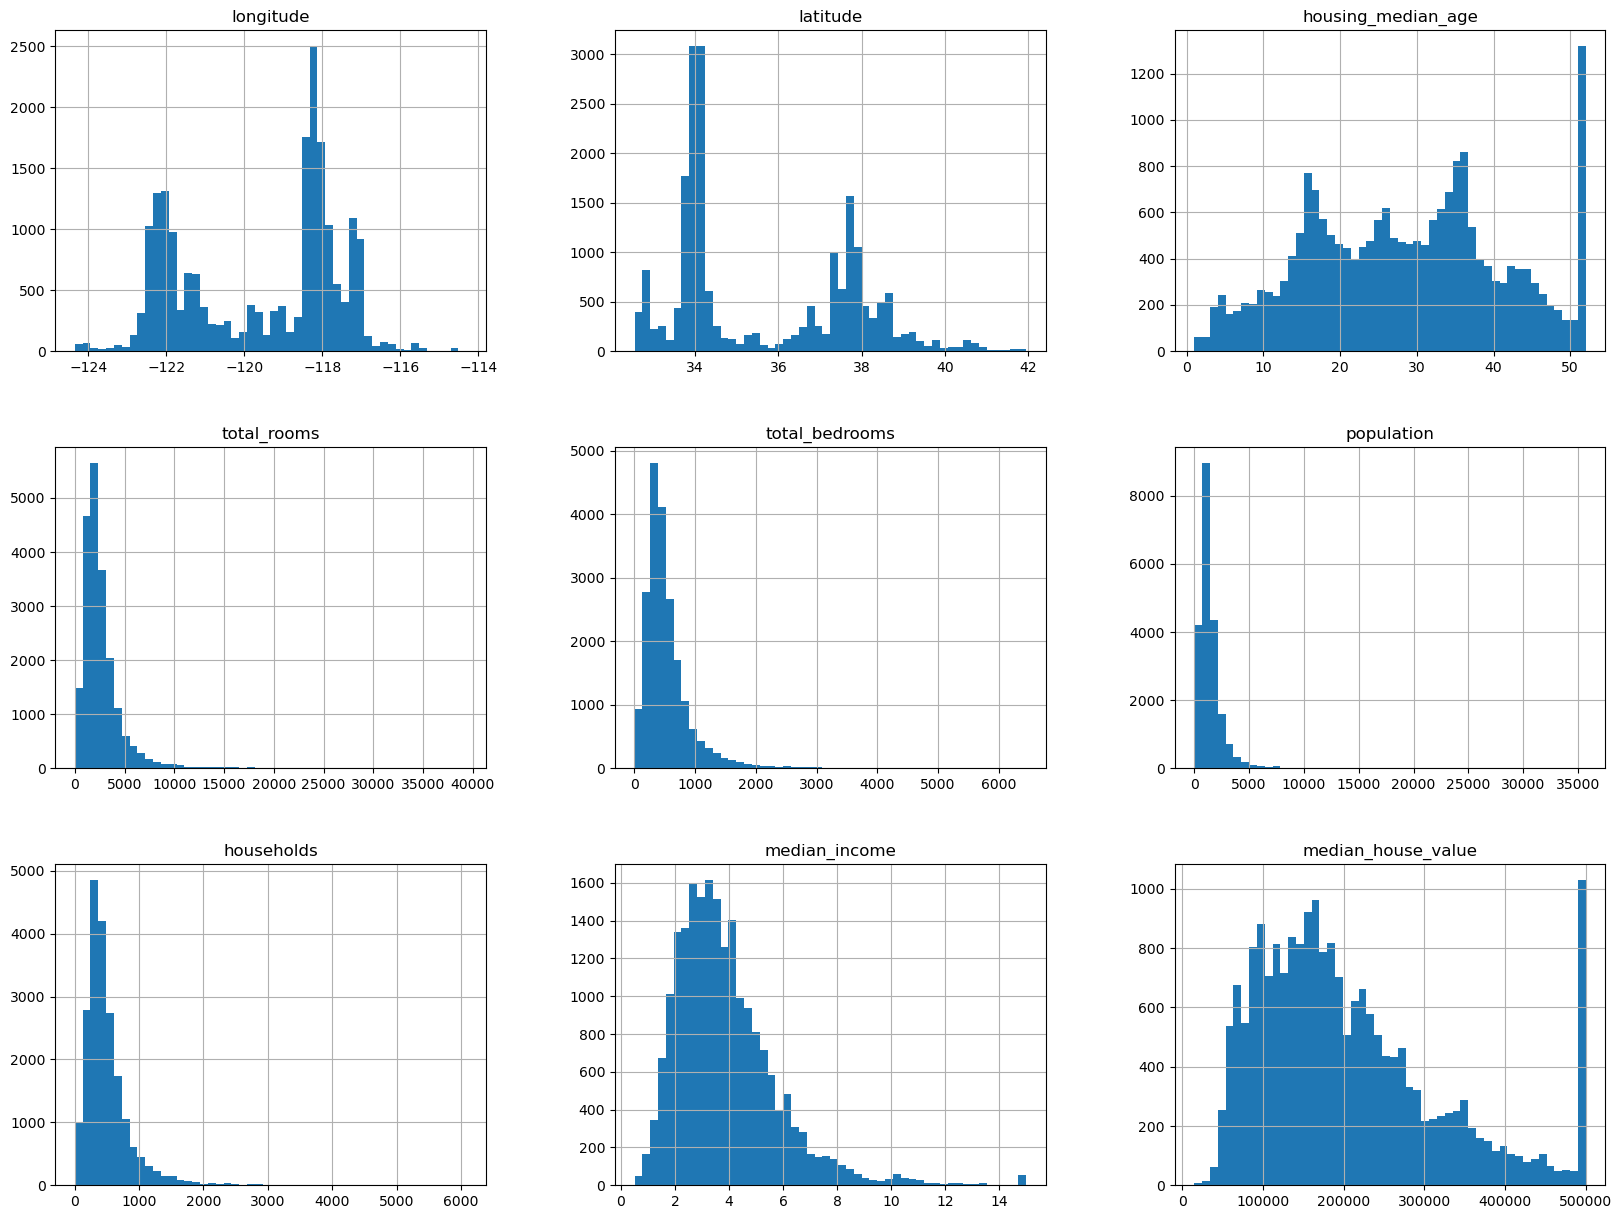

In [8]:
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

Los ingresos medios `median_income` están expresados en decenas de miles, además fueron limitados a un valor superior de 15 y 0.5 en el inferior (contacto con el equipo que tomó los datos).

El atributo target (precio de la casa) también fue limitado y en este caso podría llegar a ser un problema porque nuestro algoritmo de clasificación podría aprender que el precio nunca supera ese umbral (contacto con nuestro cliente).

**2 opciones:**

- obtener los valores correctos para esos distritos.

- eliminar esos distritos del dataset, nuestro algoritmo debería poder predecir valores mayores a 500000.

Podemos notar también que los atributos tienen escalas muy diferentes.

También tenemos datos con sesgo a la derecha, esto puede ocasionar que le lleve más tiempo a nuestros algoritmos de aprendizaje detectar patrones - sería recomendable aplicar alguna transformación a estos atributos.

## Atención!! 

Antes de seguir mirando los datos, vamos a separarlos en un conjunto de entrenamiento y un conjunto de prueba

## Separar los datos en entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


¿Cómo saber si nuestro conjunto de prueba es representativo del conjunto original? Hay que consultar a un experto

Suponiendo que hablamos con expertos y nos dicen que el `median_income` es un atributo muy importante para predecir los precios de las vivienda. Como `median_income` es un atributo numérico continuo, primero se debe crear un atributo de categórico a partir del mismo. 

<AxesSubplot:>

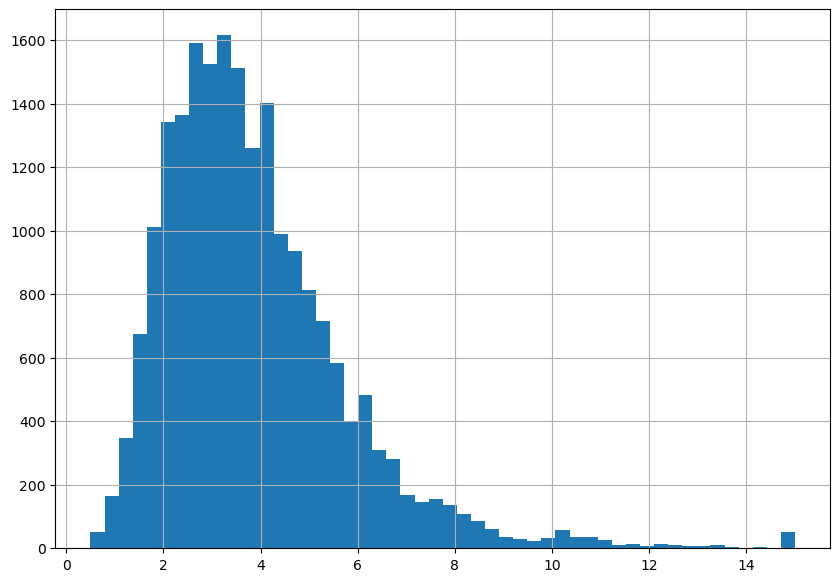

In [10]:
df_housing["median_income"].hist(bins=50, figsize=(10,7))

El código siguiente utiliza la función pd.cut() para crear un atributo `income_cat` con cinco categorías (etiquetadas de 1 a 5): la categoría 1 va de 0 a 1,5 (es decir, menos de 15.000 $), la categoría 2 de 1,5 a 3, etc.

In [11]:
df_housing["income_cat"] = pd.cut(df_housing["median_income"], 
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                                labels=[1, 2, 3, 4, 5])
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


Text(0.5, 0, 'Income category')

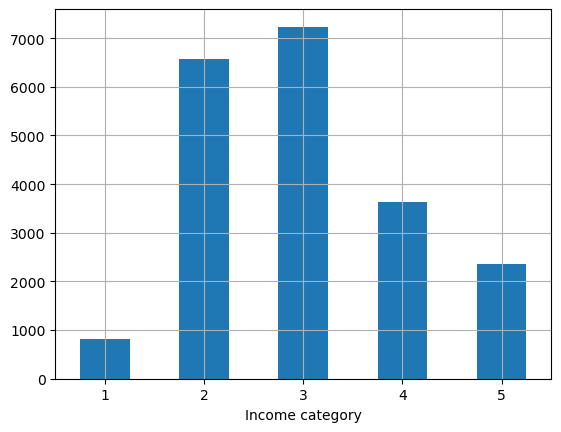

In [12]:
df_housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")

Ahora que tenemos la columna `income_cat` en categorías, podemos dividir los datos de manera estratificada.

In [13]:
train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42, shuffle=True, stratify=df_housing['income_cat'])
print(train_set.shape)
print(test_set.shape)

(16512, 11)
(4128, 11)


In [14]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualizar los datos Geográficamente



In [15]:
housing = train_set.copy()

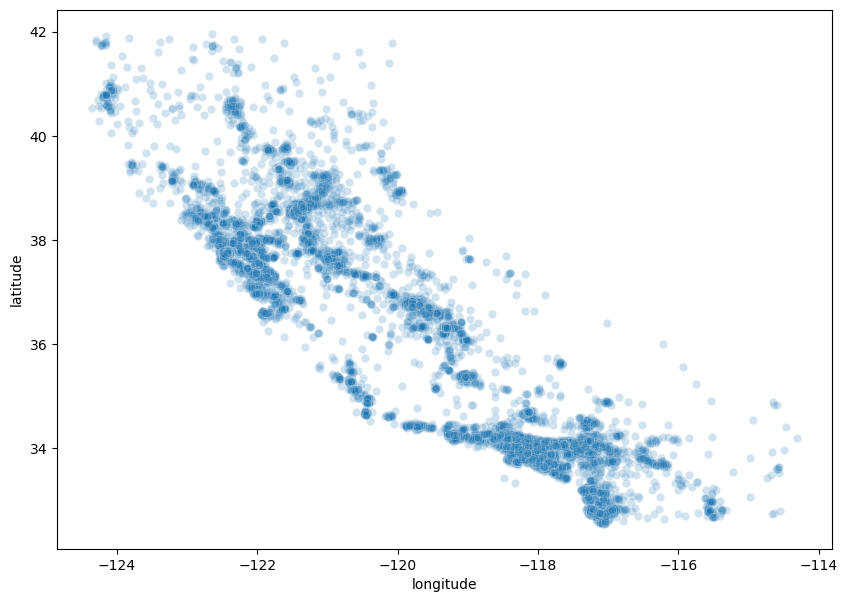

In [16]:
plt.figure(figsize=(10,7))
_ = sns.scatterplot(data=housing, x = "longitude", y = "latitude", alpha=0.2)

Modifique el gráfico para modificar el radio de los círculos en función de la población en cada distrito y el color de los círculos represente el precio.

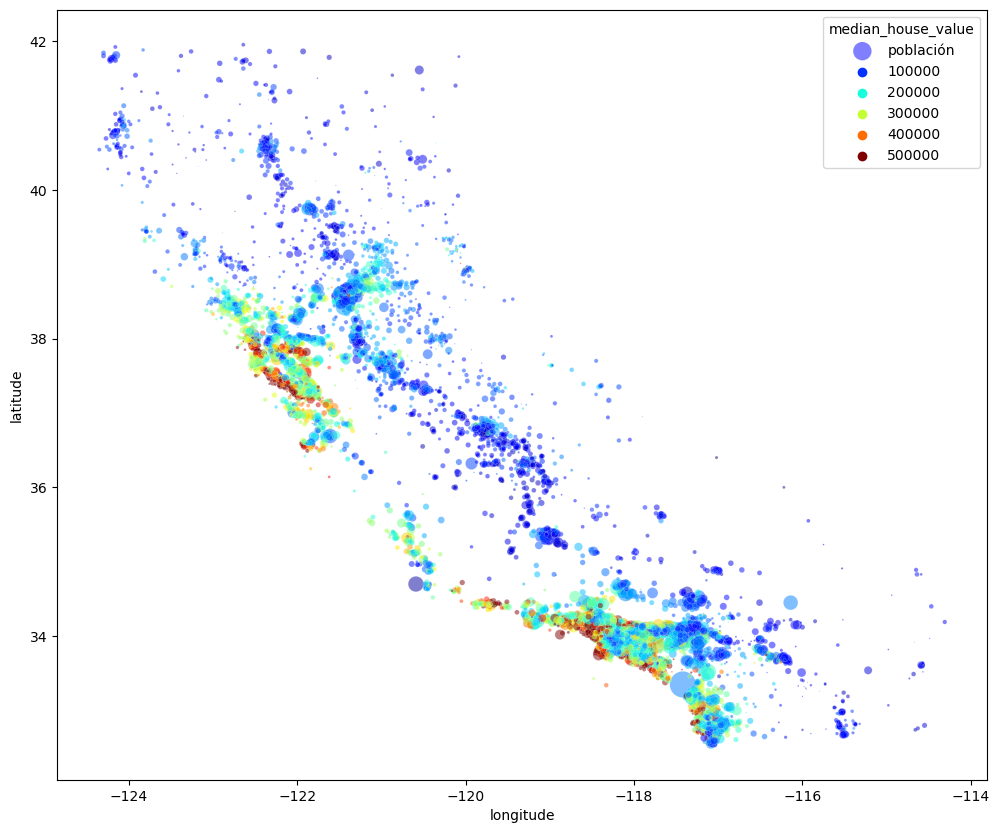

In [17]:
plt.figure(figsize=(12,10))
_ = sns.scatterplot(data=housing, x = "longitude", y = "latitude", alpha=0.5, 
                s = housing["population"]/100 , label="población", hue="median_house_value",
              palette=plt.get_cmap("jet"))


## Análisis bivariado



In [18]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

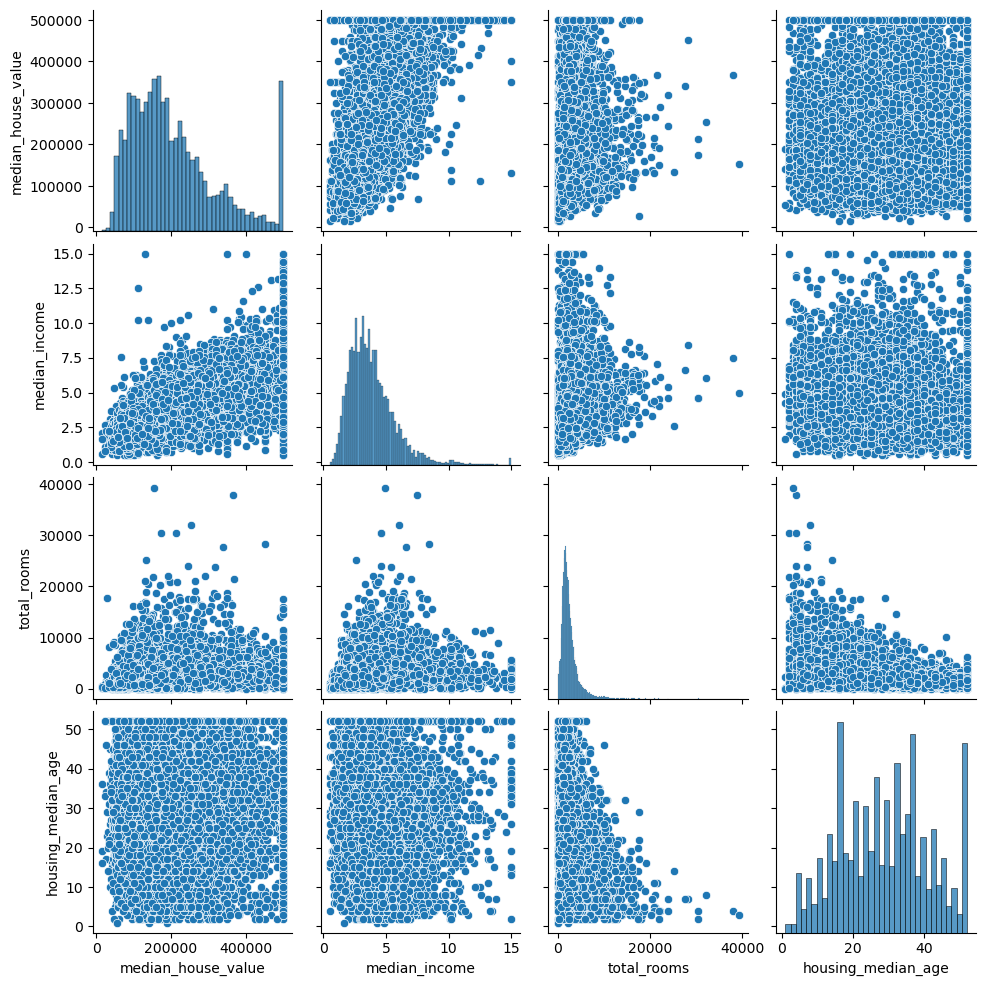

In [19]:
_ = sns.pairplot(housing.loc[:, ("median_house_value", "median_income", "total_rooms", "housing_median_age")])

Obtenga la matriz de correlación de el conjunto de datos completo y grafique un mapa de calor. 

In [20]:
matriz_correlacion = housing.corr()
matriz_correlacion

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [21]:
matriz_correlacion["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

¿Qué atributo presenta mayor correlación con la salida o target?

### Experimentar combinación de atributos

El número total de habitaciones de un distrito no es muy útil si no se sabe cuántas viviendas hay en el distrito. Lo que realmente interesa es el número de habitaciones por viviendas. Del mismo modo, el número total de dormitorios por sí mismo no es muy útil: probablemente sería mejor compararlo con el número de habitaciones. Y la población por hogar también parece una combinación de atributos interesante.

In [22]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [23]:
nueva_matriz_correlacion = housing.corr()
nueva_matriz_correlacion["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16354 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


## Preparar los datos para usar con nuestros algoritmos de ML

In [25]:
housing = train_set.drop("median_house_value", axis=1)
target = train_set["median_house_value"].copy()

### Datos faltantes

Una estrategia para trabajar con datos faltantes es imputar un valor (cero, la media o mediana del atributo)

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [27]:
indices_filas_nan = housing.isnull().any(axis=1)
housing.loc[indices_filas_nan].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


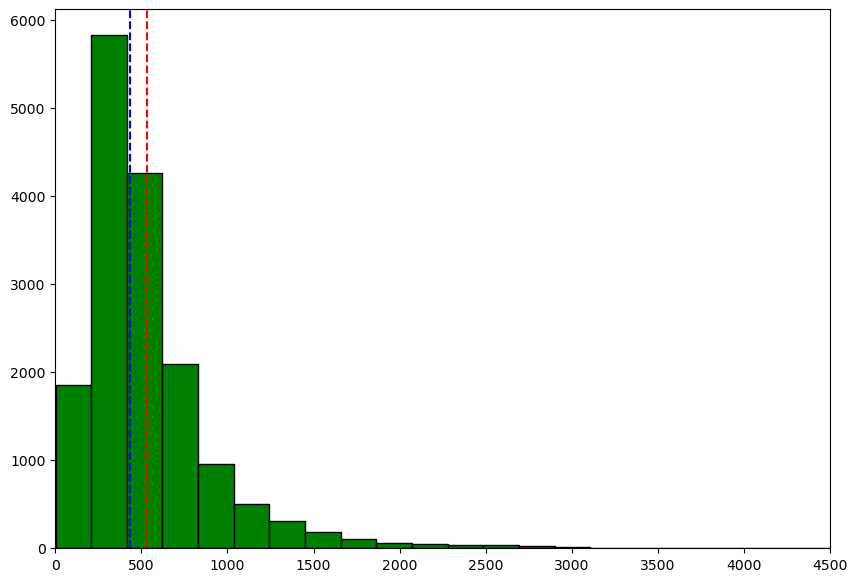

In [28]:
plt.figure(figsize=(10,7))
plt.hist(housing["total_bedrooms"], bins=30, edgecolor='k', color='g')
plt.axvline(x=housing["total_bedrooms"].mean(), c='r', linestyle='--')
plt.axvline(x=housing["total_bedrooms"].median(), c='b', linestyle='--')
_ = plt.xlim(0, 4500)

In [29]:
housing_op1 = housing.copy()
mediana = housing_op1["total_bedrooms"].median()
housing_op1.loc[ housing_op1["total_bedrooms"].isna(), "total_bedrooms" ] = mediana
housing_op1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [30]:
#otra forma
housing_op2 = housing.copy()

In [31]:
housing_op2["total_bedrooms"].fillna(value=mediana, inplace=True)

In [32]:
housing_op2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Otras estrategias podrían ser eliminar las filas correspondientes que tienen datos faltantes, o eliminar la columna(atributo) completa

In [33]:
housing_op3 = housing.copy()
housing_op3.dropna(subset=["total_bedrooms"], inplace=True) 
housing_op3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [34]:
housing_op4 = housing.copy()
housing_op4.drop("total_bedrooms", axis=1, inplace=True)  # option 2
housing_op4.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN


In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Atención!!!

Si usamos la estrategia de imputar un valor, se debe guardar el valor de la mediana obtenida de los datos de entrenamiento, para hacer lo mismo con los datos de prueba.

Si nuestro conjunto de datos tiene muchas columnas con datos faltantes, imputar valores se vuelve tedioso porque hay que repetir la operación en cada columna:

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Como la media sólo se puede calcular sobre atributos numéricos, hay que crear una copia de los datos sin `ocean_proximity`

In [37]:
housing_num = housing.drop("ocean_proximity", axis=1)

Llamo al método `fit` para "entrenar" a mi objeto imputer, es decir para que calcule la mediana de cada columna del dataset.

In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Uso el objeto "entrenado" para transformar el conjunto de entrenamiento reemplazando los datos faltantes con las medianas para cada columna.

In [40]:
X = imputer.transform(housing_num) # devuelve un array de numpy

In [41]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [42]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.loc[indices_filas_nan].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


### Atributos categóricos

In [43]:
housing_cat= housing[["ocean_proximity"]]

In [44]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

La mayoría de algoritmos no puede trabajar con variables categóricas y prefieren atributos numéricos. 

**Los convertimos a datos categóricos ordinales**

In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_ordinal = ordinal_encoder.fit_transform(housing_cat)
type(housing_cat_ordinal)

numpy.ndarray

In [46]:
housing_cat_ordinal

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Un problema en este caso, es que el algoritmo de ML podría asumir que dos valores próximos son más similares que los distantes o tienen un orden y en nuestro caso, las categorías no tienen un orden establecido.

**Hacemos la conversión a atributo binario _"one-hot encoding"_**

In [48]:
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot  = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [50]:
housing_cat_1hot.indices

array([1, 4, 1, ..., 0, 0, 1], dtype=int32)

In [51]:
housing_cat_1hot.todense()

matrix([[0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])

### Normalización de los datos

En general, los algoritmos de ML no tienen buen desempeño cuando los atributos tienen diferentes escalas

In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


Existen 2 maneras de llevar todos los atributos a una misma escala:

**Normalización min-max**

$$x_{norm}^{(i)} = \frac{x^{(i)} - x_{min}}{x_{max}-x_{min}}$$

**Estandarización**
$$x_{std}^{(i)} = \frac{x^{(i)} - \mu_x}{\sigma_x}$$

In [53]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) #por defecto entre 0 y 1
housing_min_max = min_max_scaler.fit_transform(housing_num)

### Atención!!!

Igual a cuando imputamos un valor a los datos faltantes, se debe "entrenar" el 

In [54]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_std = std_scaler.fit_transform(housing_num)

## Unimos todo

In [55]:
#datos de entrenamiento: housing
#datos de prueba: test_set

list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

**Pipeline numérico**

In [56]:
from sklearn.pipeline import Pipeline

pipeline_num = Pipeline(
    [
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ]
)

In [57]:
housing_num_tr = pipeline_num.fit_transform(housing_num)

**Pipeline completo**

In [58]:
from sklearn.compose import ColumnTransformer

atributos_num = list(housing_num)
atributos_cat = ["ocean_proximity"]

pipeline_full = ColumnTransformer(
    [
        ("num", pipeline_num, atributos_num),
        ("cat", OneHotEncoder(), atributos_cat)
    ]
)

In [59]:
housing_train_final = pipeline_full.fit_transform(housing)

In [60]:
atributos_num = list(housing_num)
train_set = pd.DataFrame(housing_train_final, columns=atributos_num + ( ['op'+ str(i) for i in range(5)] )  ) 


In [61]:
housing_test_final = pipeline_full.transform(test_set)
target_test = test_set["median_house_value"]
test_set = pd.DataFrame(housing_test_final, columns=atributos_num + ( ['op'+ str(i) for i in range(5)] )  )

In [62]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   op0                 16512 non-null  float64
 9   op1                 16512 non-null  float64
 10  op2                 16512 non-null  float64
 11  op3                 16512 non-null  float64
 12  op4                 16512 non-null  float64
dtypes: float64(13)
memory usage: 1.6 MB


In [63]:
mediana = housing_op1["total_bedrooms"].median()

In [64]:
train_set["total_bedrooms"].fillna(value=mediana, inplace=True)

In [65]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   op0                 16512 non-null  float64
 9   op1                 16512 non-null  float64
 10  op2                 16512 non-null  float64
 11  op3                 16512 non-null  float64
 12  op4                 16512 non-null  float64
dtypes: float64(13)
memory usage: 1.6 MB


# Análisis con modelos

## Univariado

<AxesSubplot:>

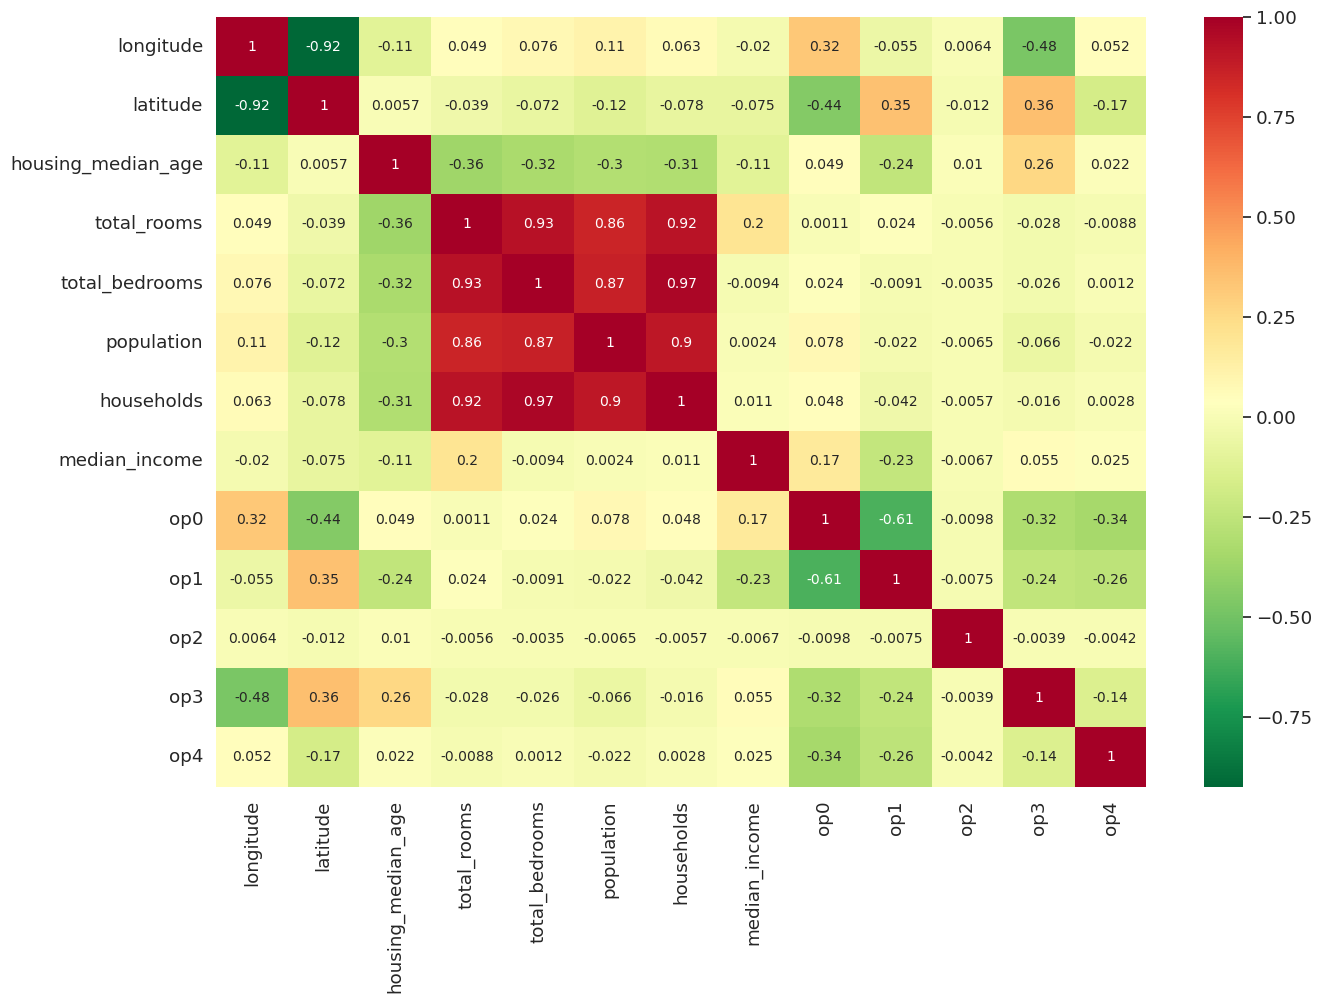

In [66]:
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.figure(figsize=(15,10))
sns.set(font_scale = 1.2)
sns.heatmap(train_set.corr(), annot = True, cmap = 'RdYlGn_r', annot_kws={"size": 10}) 

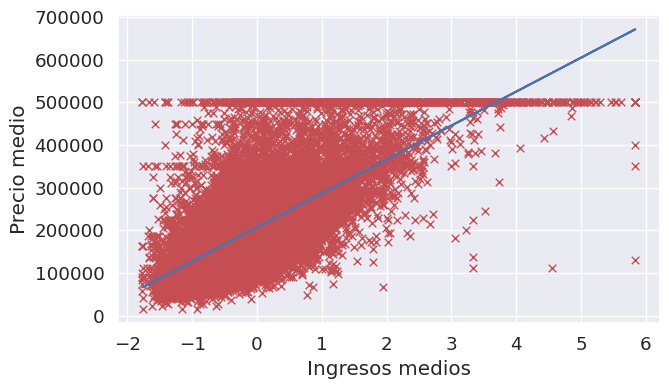

In [67]:
from sklearn.linear_model import LinearRegression
reg_univ = LinearRegression()

X = train_set["median_income"]
y = target

plt.figure(figsize=(7,4))
plt.scatter(X, y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Ingresos medios')
plt.ylabel('Precio medio');

reg_univ.fit(X.to_numpy().reshape(-1, 1), y)

y_sk = reg_univ.intercept_ + reg_univ.coef_ * X

plt.plot(X, y_sk, label='Regresión Lineal (Scikit-learn)')

## Bivariado

In [68]:
reg_biv = LinearRegression()

X_biv = train_set[["median_income", "total_rooms"]].copy()
y_biv = target

reg_biv.fit(X_biv, y_biv)

y_sk_bi = reg_biv.predict(X_biv)

print(f"y_est = {reg_biv.intercept_} + {reg_biv.coef_[0]} * x1 + {reg_biv.coef_[1]} * x2" )

y_est = 207005.32237160852 + 79559.25623316992 * x1 + -287.07245312863836 * x2


## Multivariado

In [69]:
reg_multiv = LinearRegression()
X_multiv = train_set
y_multiv = target

reg_multiv.fit(X_multiv, y_multiv)
y_sk_multiv = reg_multiv.predict(X_multiv)

print(f"Término independiente: {reg_multiv.intercept_}\nCoeficientes: {reg_multiv.coef_}")

Término independiente: 237792.18716701373
Coeficientes: [-53158.46752879 -54016.74420924  13723.55752923 -10022.16419715
  29937.91903315 -43815.82009104  28900.33562175  73737.44249419
 -18139.05294479 -57836.49981854 112925.81797133 -22517.51078879
 -14432.75441921]


In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
print("Univariado: ", mean_squared_error(y, y_sk, squared=False))
print("Bivariado: ", mean_squared_error(y_biv, y_sk_bi, squared=False))
print("Multivariado: ", mean_squared_error(y_multiv, y_sk_multiv, squared=False))

Univariado:  84056.18763327331
Bivariado:  84055.71705513114
Multivariado:  69050.56219504567


In [72]:
from sklearn.metrics import r2_score

In [73]:
print("Univariado: ", r2_score(y, y_sk))
print("Bivariado: ", r2_score(y_biv, y_sk_bi))
print("Multivariado: ", r2_score(y_multiv, y_sk_multiv))

Univariado:  0.47217589093804146
Bivariado:  0.4721818008371307
Multivariado:  0.6438078994746375


#### Con los datos de prueba

In [74]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   op0                 4128 non-null   float64
 9   op1                 4128 non-null   float64
 10  op2                 4128 non-null   float64
 11  op3                 4128 non-null   float64
 12  op4                 4128 non-null   float64
dtypes: float64(13)
memory usage: 419.4 KB


In [75]:
X = test_set["median_income"]
y = target_test

y_sk_test = reg_univ.intercept_ + reg_univ.coef_ * X
print("Univariado: ", mean_squared_error(y, y_sk_test))

Univariado:  6794870325.165891


In [76]:
X_biv = test_set[["median_income", "total_rooms"]]
y_biv = target_test
y_sk_bi_test = reg_biv.predict(X_biv)
print("Bivariado: ", mean_squared_error(y, y_sk_bi_test))

Bivariado:  6794884484.209884


In [77]:
X_multiv = test_set
y_multiv = target_test

y_sk_multiv_test = reg_multiv.predict(X_multiv)

print("Multivariado: ", mean_squared_error(y, y_sk_multiv_test))

Multivariado:  4535602240.029962


In [78]:
print("Univariado: ", r2_score(y, y_sk_test))
print("Bivariado: ", r2_score(y_biv, y_sk_bi_test))
print("Multivariado: ", r2_score(y_multiv, y_sk_multiv_test))

Univariado:  0.4786471230995255
Bivariado:  0.4786460367125944
Multivariado:  0.6519949368926146
